# Injection Molding - Defect Parts Prediction Model (KNN)

## Project Description
Injection molding involves the solidification of a molten thermoplastic under pressure inside a metal mold. 
Injection molding is used to manufacture many plastic products, such as, bottle caps, disposable utensils, shoe soles, toys, luggage, electric plugs, toothbrush, furniture, and many other plastic products. 
Process: https://www.youtube.com/watch?app=desktop&v=RMjtmsr3CqA

There are several defects type in injection molding parts. Flash results from either insufficient clamping force or too high of injection or packing pressure. Sink marks result from the shrinking of plastic in thicker regions of an injection molded part. A short shot is a consequence of either an insufficient volume of plastic begins injected into the mold, or premature freezing of the gates or sprue. Burning marks on the final part.<br>
The file "InjectionMoldingMachineData.csv" collected the data from an Injection Molding Machine varying two parameters,the mold temperature and the clamping force. Any rejected part, with an defect, was labaled as "1".<br> 
Your Task: Build a ML model to predict if a specific force and temperature reults in a defective part.

## Importing the Libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Data and Checking

In [34]:
dataset = pd.read_csv('../../Data/Injection_Molding_Machine_Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset

,Temperature (C),Clamping Force (N),Part Defect
0,57,2280,0
1,105,2400,0
2,78,5160,0
3,81,6840,0
4,57,9120,0
...,...,...,...
395,138,4920,1
396,153,2760,1
397,150,2400,1
398,108,3960,0


,Temperature (C),Clamping Force (N),Part Defect
0,57,2280,0
1,105,2400,0
2,78,5160,0
3,81,6840,0
4,57,9120,0
...,...,...,...
395,138,4920,1
396,153,2760,1
397,150,2400,1
398,108,3960,0


## Splitting the Dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Feature Scaling

In [36]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

##### <font color=red> Wait!!!<br>
##### <font color=blue> Why we use fit_transform() on training data but transform() on the test data? 😕 <br>
We call fit_transform() method on our training data and transform() method on our test data. But the actual question is why do we do this? <br>
For example, when we are building a k-Nearest Neighbor model and we have to scale our features. The most common way to scale the features is through scikit-learn’s StandardScaler class.<br>
Recall, Data standardization is the process of rescaling the attributes so that they have mean as 0 and variance as 1. The ultimate goal to perform standardization is to bring down all the features to a common scale without distorting the differences in the range of the values.<br>
In sklearn.preprocessing.StandardScaler(), fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data. Here, the model built by us will learn the mean and variance of the features of the training set. These learned parameters are then used to scale our test data.<br>
So what actually is happening here! 🤔<br>
The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.<br>
Now, we want scaling to be applied to our test data too and at the same time do not want to be biased with our model. We want our test data to be a completely new and a surprise set for our model. The transform method helps us in this case. <br>
Using the transform method we can use the same mean and variance as it is calculated from our training data to transform our test data. Thus, the parameters learned by our model using the training data will help us to transform our test data.<br>
Now the question is why we did this? 🙃<br>
Here is the simple logic behind it!<br>
If we will use the fit method on our test data too, we will compute a new mean and variance that is a new scale for each feature and will let our model learn about our test data too. Thus, what we want to keep as a surprise is no longer unknown to our model and we will not get a good estimate of how our model is performing on the test (unseen) data which is the ultimate goal of building a model using machine learning algorithm.<br>
This is the standard procedure to scale our data while building a machine learning model so that our model is not biased towards a particular feature of the dataset and at the same time prevents our model to learn the features/values/trends of our test data.<br>
##### <font color=blue> In summary, we always apply fit_transform(X_train) to the training data, and only transform(X_test) to the test data. <br>
Still Confused: Read more here: https://towardsdatascience.com/what-and-why-behind-fit-transform-vs-transform-in-scikit-learn-78f915cf96fe
    
By the way, you can copy emojis from https://getemoji.com/, and paste on Markdown cells ⚙️ <br>

## Training the K-NN Model on the Training set

In [37]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

KNeighborsClassifier()

<font color=red> Note: <font color=black>"minkowski" with p=2 is equivalent to the standard Euclidean metric.
In ML, we can use differnt distances, the typical one are:<br>

Manhattan: p=0 <br>
Euclidean: p=2 <br>
Chebyshev: p=∞ <br>
Minkowski: p= any other numbers <br>

The most common is the Euclidean<br>

If you are interested in, you may read more on this topic here:<br>
https://rittikghosh.com/Minkowski_distance.html




## Predicting a new Result

In [38]:
Defect = classifier.predict(sc.transform([[130, 15000]]))
if Defect == 1:
    print("The Part will be Defective")
else:
    print("The Part will be Okay")

The Part will be Defective
The Part will be Defective


##### If you like to make it more fun, you can add emoji!
First you need to install emoji library. That is easy- Run Anaconda Prompt, then type:<br>
C:\WINDOWS\system32>pip install emoji --upgrade <br>
After that, add emoji like below:

In [39]:
import emoji

if Defect == 1:
    print(emoji.emojize("The Part will be Defective :thumbs_down:"))
else:
    print(emoji.emojize("The Part will be Defective :thumbs_up:"))

The Part will be Defective 👎
The Part will be Defective 👎


## Predicting the Test set Results

In [40]:
y_pred = classifier.predict(X_test)

compare = [y_pred, y_test]
pd.DataFrame(compare)

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,1


,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,1


## Making the Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print("Your Model Accuracy is=", accuracy_score(y_test, y_pred) * 100, "%")

[[55  3]
 [ 1 21]]
Your Model Accuracy is= 95.0 %
[[55  3]
 [ 1 21]]
Your Model Accuracy is= 95.0 %


##### <font color=red> Confusion Matrix <br>
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
I will review this during the lecture. If you are interested in learning more, this linke is a good source: https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

## Visualising the Training Set Results

This part of the code is an extra/optional element, just for visualization. It is only useful when we have only 2 features. This is an standard code, which you can use for similar problems. You just need to adjust the "step" (smaller the step/grid means higher resolution), and the limit; for example here, based on the data, we adjust the limit to be +/-10 for X1, and +/-1000 for X2

As you saw above, In [6], we can predict if the result will be 0 or 1, for any input, Temperature and Force. Simply by implimenting: 

In [42]:
Result = classifier.predict(sc.transform([[130, 15000]]))
print(Result)

[1]
[1]


Similarly, we can predic the result, using the same line of code, for a range of Temperature (T), for example between 50-200C, and a range of Force (F), for example, between 2000-18000N. We can divide these ranges to small increments and at each point (T,F), find if the result is 0 (Part is Okay) or 1 (Defective). <br>
The following cell creates a grid for a range of T, between 10C below and above min and max temperature and a grid betweeb 1000N below and above min and max force. Remember the smaller the increments, the more accuate the results, but it will take longer to compute. 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


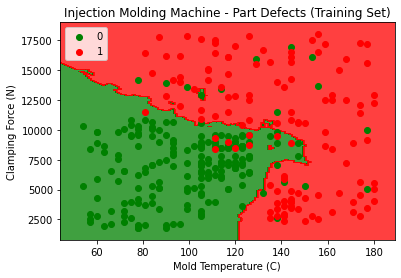

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


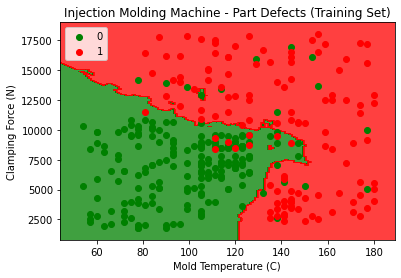

In [43]:
from matplotlib.colors import ListedColormap

# Recall - we have scaled out X_Train; we need to return it back to the original.
X_set = sc.inverse_transform(X_train)

# We haven't though scaled the y_train (we never scale 0 & 1)
y_set = y_train

# Creating the grid wirh step=1
X1_Grid, X2_Grid = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                               np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))

plt.contourf(X1_Grid, X2_Grid,
             classifier.predict(sc.transform(np.array([X1_Grid.ravel(), X2_Grid.ravel()]).T)).reshape(X1_Grid.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))

plt.xlim(X1_Grid.min(), X1_Grid.max())
plt.ylim(X2_Grid.min(), X2_Grid.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Injection Molding Machine - Part Defects (Training Set)')
plt.xlabel('Mold Temperature (C)')
plt.ylabel('Clamping Force (N)')
plt.legend()
plt.show()

## Visualising the Test Set Results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


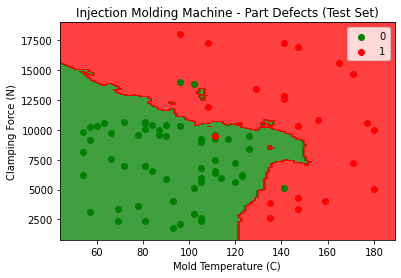

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


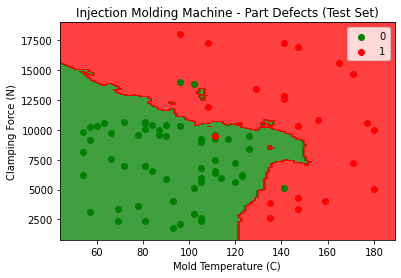

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


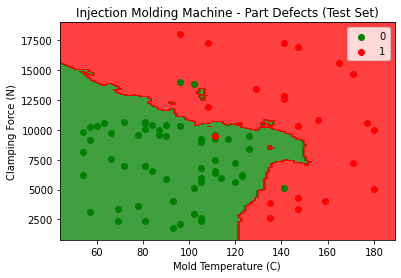

In [44]:
from matplotlib.colors import ListedColormap

X_set = sc.inverse_transform(X_test)
y_set = y_test

X1_Grid, X2_Grid = np.meshgrid(np.arange(start=X_set[:, 0].min() - 10, stop=X_set[:, 0].max() + 10, step=1),
                               np.arange(start=X_set[:, 1].min() - 1000, stop=X_set[:, 1].max() + 1000, step=1))

plt.contourf(X1_Grid, X2_Grid,
             classifier.predict(sc.transform(np.array([X1_Grid.ravel(), X2_Grid.ravel()]).T)).reshape(X1_Grid.shape),
             alpha=0.75, cmap=ListedColormap(('green', 'red')))

plt.xlim(X1_Grid.min(), X1_Grid.max())
plt.ylim(X2_Grid.min(), X2_Grid.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c=ListedColormap(('green', 'red'))(i), label=j)

plt.title('Injection Molding Machine - Part Defects (Test Set)')
plt.xlabel('Mold Temperature (C)')
plt.ylabel('Clamping Force (N)')
plt.legend()
plt.show()